# The AirBnB Equation: AirBnB's Success Across Cities

Group 1: Juncheng (Leo) Zhu, Kang Ni, Yu-Ting (Tiffany) Chen, Yujiun (Janice) Zou, Hemanth Kumar

# **1. Introduction**

## **Business Problem Definition**

Airbnb is one of the major global booking sites for vacation rentals, with many competitors being unable to keep up. As the platform grows and listings increase, it becomes harder for customers to decide which BnB is better, and more difficult for hosts to compete.

This project aims to analyze AirBnB booking/hosting activity based on different locations. We would like to uncover the aspects that influence customer behavior the most, whether that is the price, the time period, or the location.

To best demonstrate this analysis, we picked two global major cities that sees a significant amount of travellers each year: New York City and London.

In short, we will:
* Identify factors that influence booking prices
Compare demand/price in different cities during certain holidays (eg. Christmas, New Years, etc.)
* Understand factors that contribute to booking demands of certain locations during certain periods.
* Understand key factors that influence customer reviews (eg. what contributed to bad/good reviews?)

## **Motivation**

Our group enjoys travelling, and housing is often a major aspect of planning a trip. Often times we find ourselves wondering if booking an Airbnb is worth it, or if it is too risky.

We wanted to analyze and understand key factors that play into customer demands and satisfaction in terms of Airbnb stays. It would be interesting to discover what plays into successful listings (eg. price, location, etc.). By understanding these factors, AirBnB hosts would be able to make better business decisions that boost their ratings and popularity among tourists.

## **Dataset Description**

All datasets used in this project are taken from this [website](https://insideairbnb.com/), where it includes Airbnb information (listings, reviews, locations, etc) of various major cities around the world.

Dataset Size:
* New York City listings: 36,289 rows
* New York City reviews: 986,598 rows
* London listings: 96,995 rows
* London reviews: 2,019,218 rows


In this project, we are focusing on New York City, USA and London, Great Britain.

# **2. Executive Summary**

## **Overview**

This report presents a comparative analysis of Airbnb market dynamics in London and New York City, focusing on pricing, host behavior, seasonal trends, and guest sentiment. Our goal is to uncover strategic insights for pricing optimization, investment targeting, and traveler segmentation.

## **Key Findings**


**Market Size & Pricing:**

 London’s Airbnb supply is nearly triple NYC’s, fostering competitive pricing and market saturation in the city. On the other hand, NYC listings are significantly more expensive across all room types, with luxury outliers inflating averages.

**Neighborhood Dynamics:**

 Premium districts in both cities align with wealth and cultural significance. However, even top-tier/popular London neighborhoods remain more affordable than NYC’s, suggesting broader accessibility and affordability.

**Host Behavior:**

 Multi-listing hosts are more prevalent in London (19.4%) than NYC (16.3%). In both cities, they tend to charge higher prices, especially in London where the pricing gap is more pronounced.

**Seasonal Pricing & Demand:**

 Holiday and summer periods show elevated prices in both cities, with NYC consistently slightly more expensive. Seasonal price gaps are narrower than expected, indicating similar demand surges.

**Guest Engagement & Sentiment:**

 Summer contributes to peak review activity and positivity in both cities. NYC maintains higher review volume and more stable sentiment across seasons, while London shows stronger seasonal swings, especially during winter (less reviews).

 **Opportunity Zones for Hosts:**

 There are many opportunity zones in neighborhoods in NYC, and less in London. Potential hosts should consider putting their listings in the areas with high opportunity scores.

**Price-Demand Relationship:**

Geographic desireability is the strongest indicator of price. Locations that are closer to nightlife, tourist attractions, and transit hubs are more desireable and therefore have higher prices.

## **Entity Relationship Diagram**

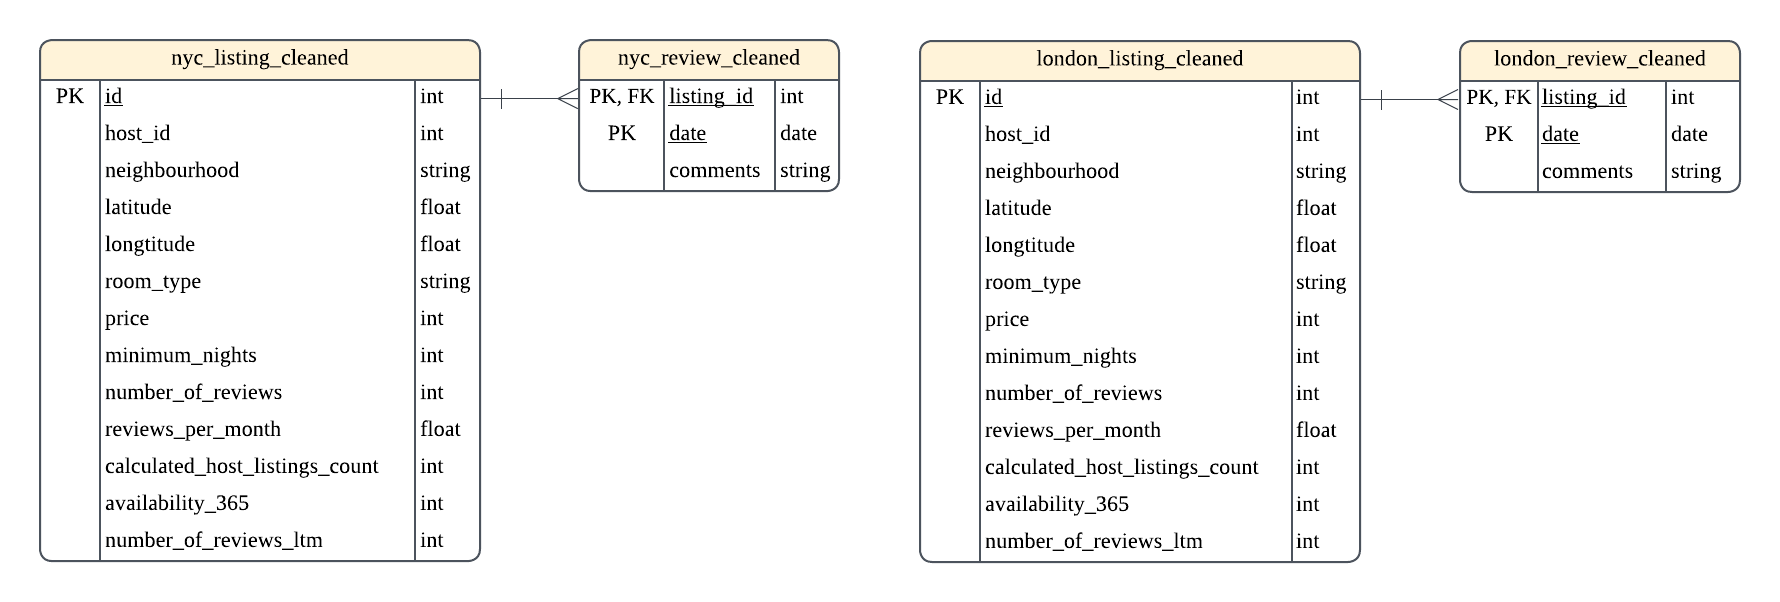

## **Tableau Dashboard**

Dashboard Link1: (NYC dashboard)
  [https://public.tableau.com/views/GroupProject_17651422052690/NYC?:language=zh-TW&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link](https://public.tableau.com/views/GroupProject_17651422052690/NYC?:language=zh-TW&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

Dashboard Link2: (London dashboard)
  [https://public.tableau.com/views/GroupProject-London/London?:language=zh-TW&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link](https://public.tableau.com/views/GroupProject-London/London?:language=zh-TW&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)


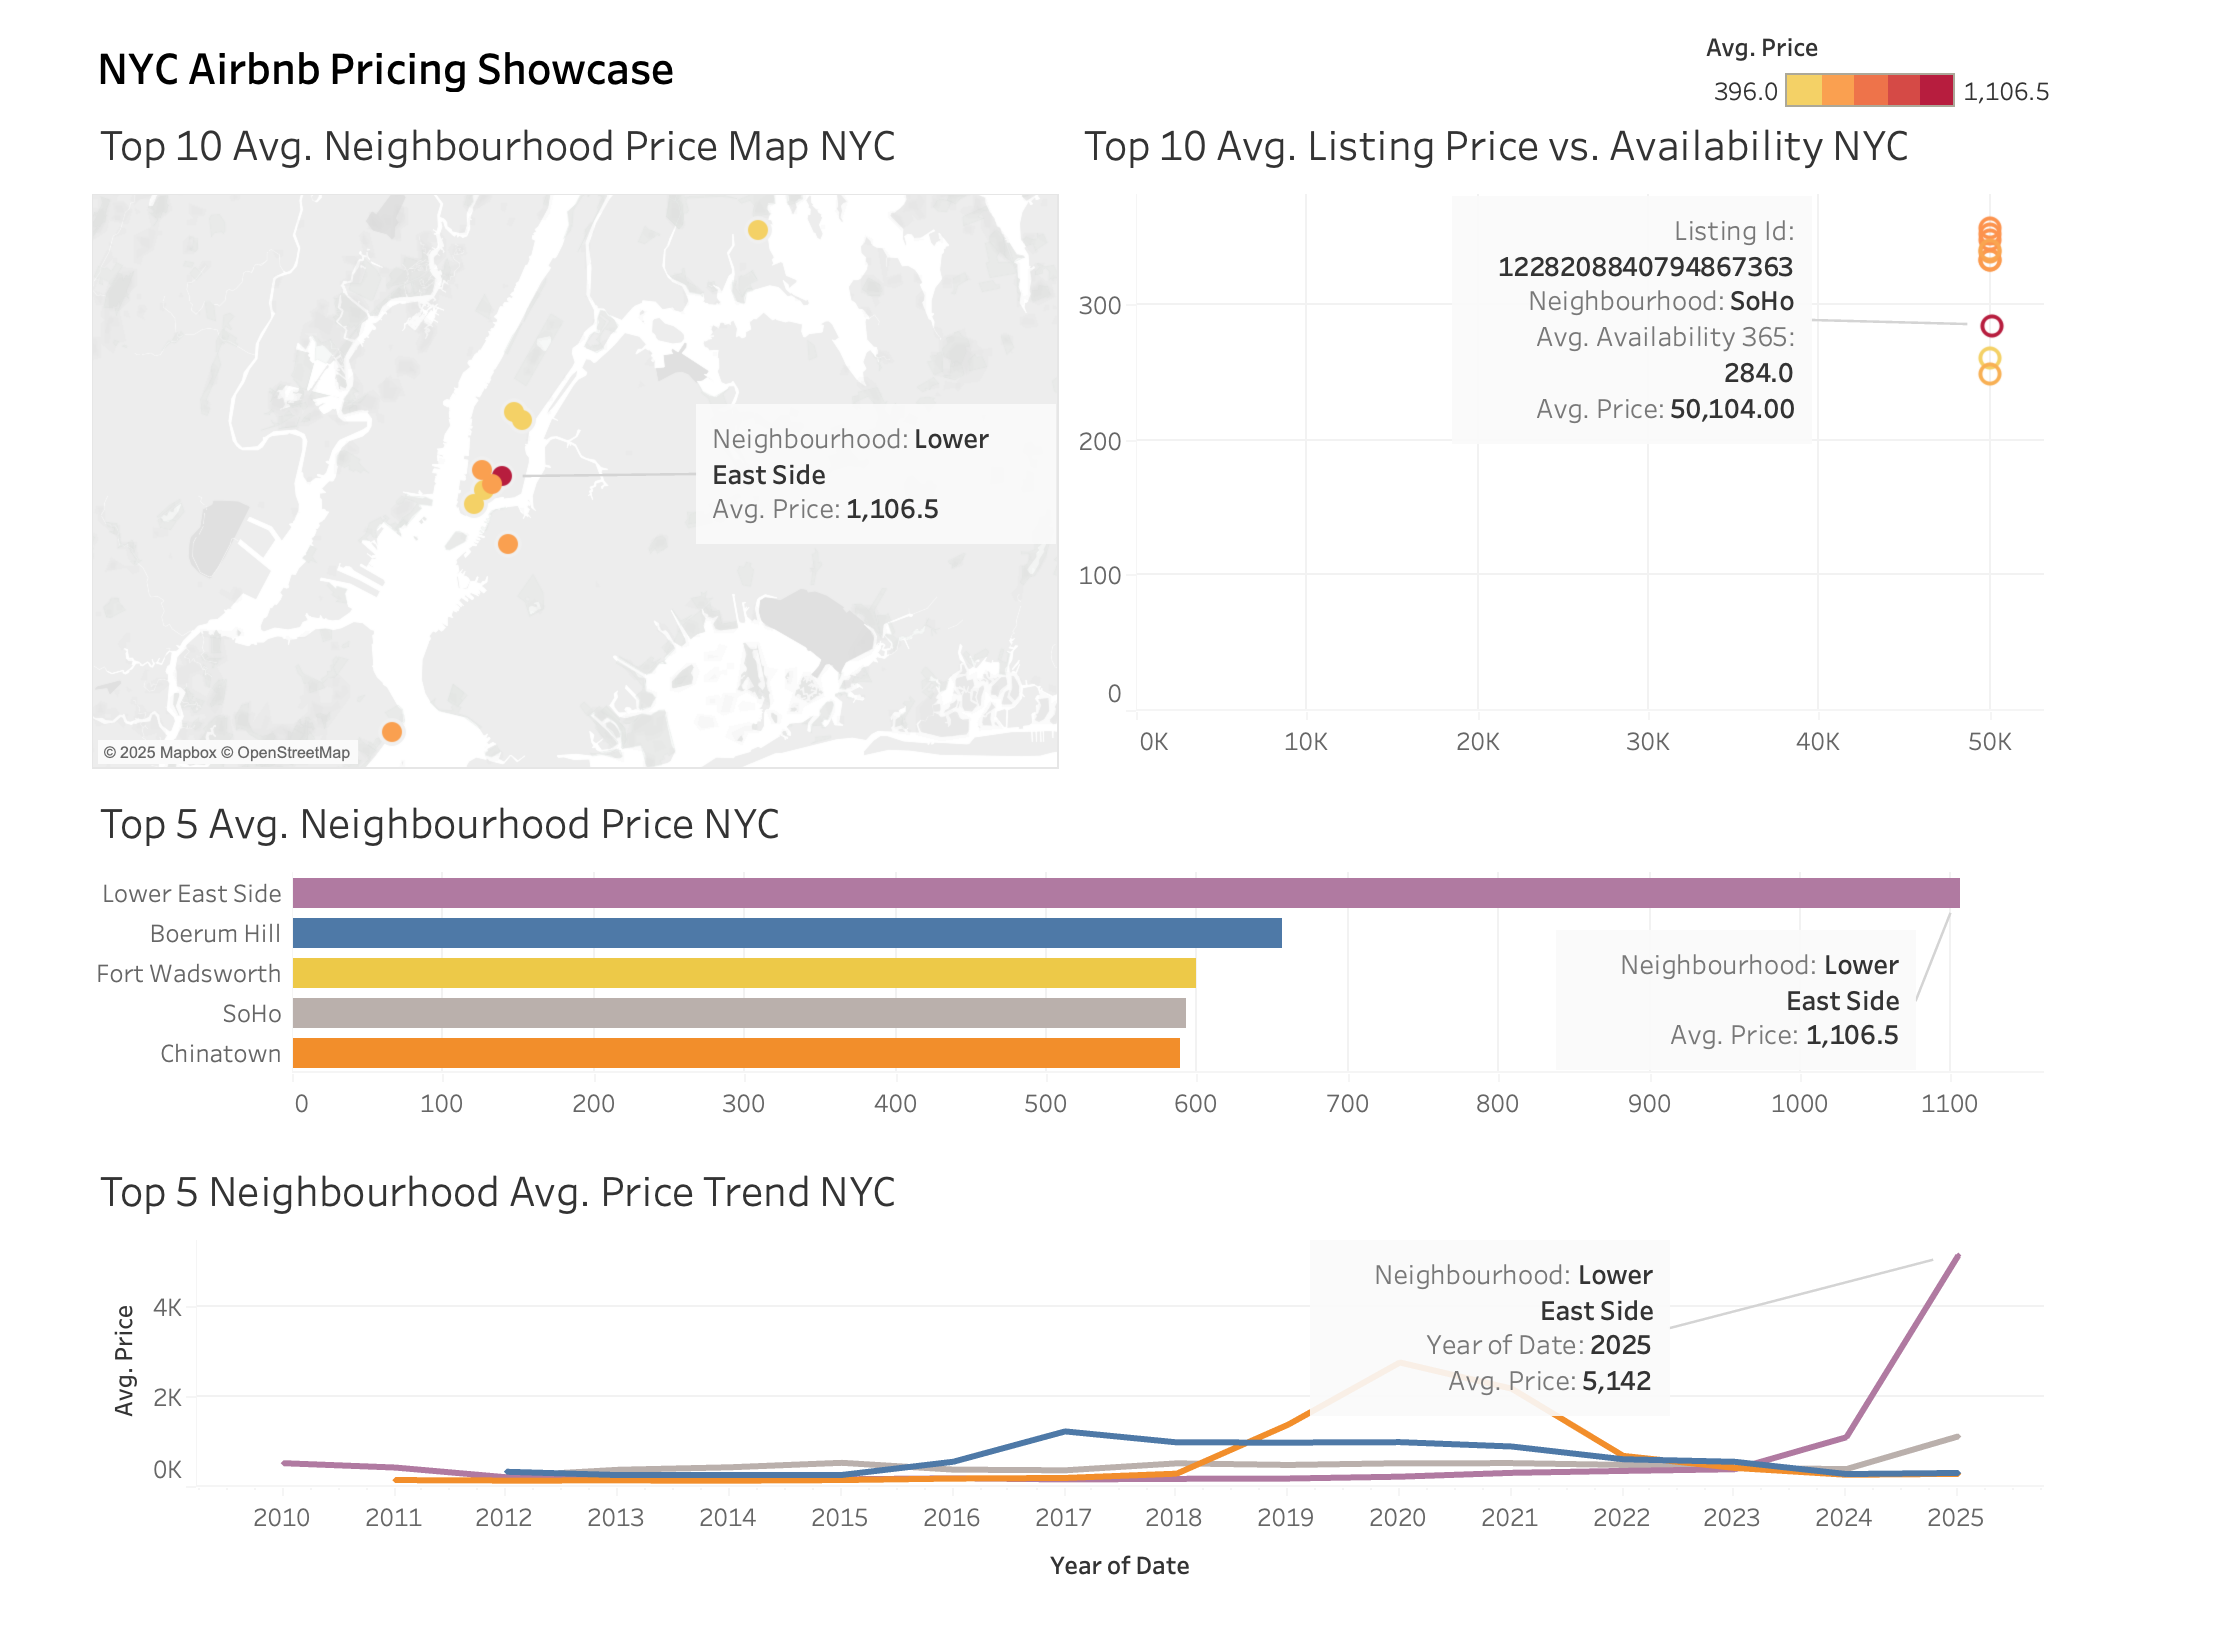

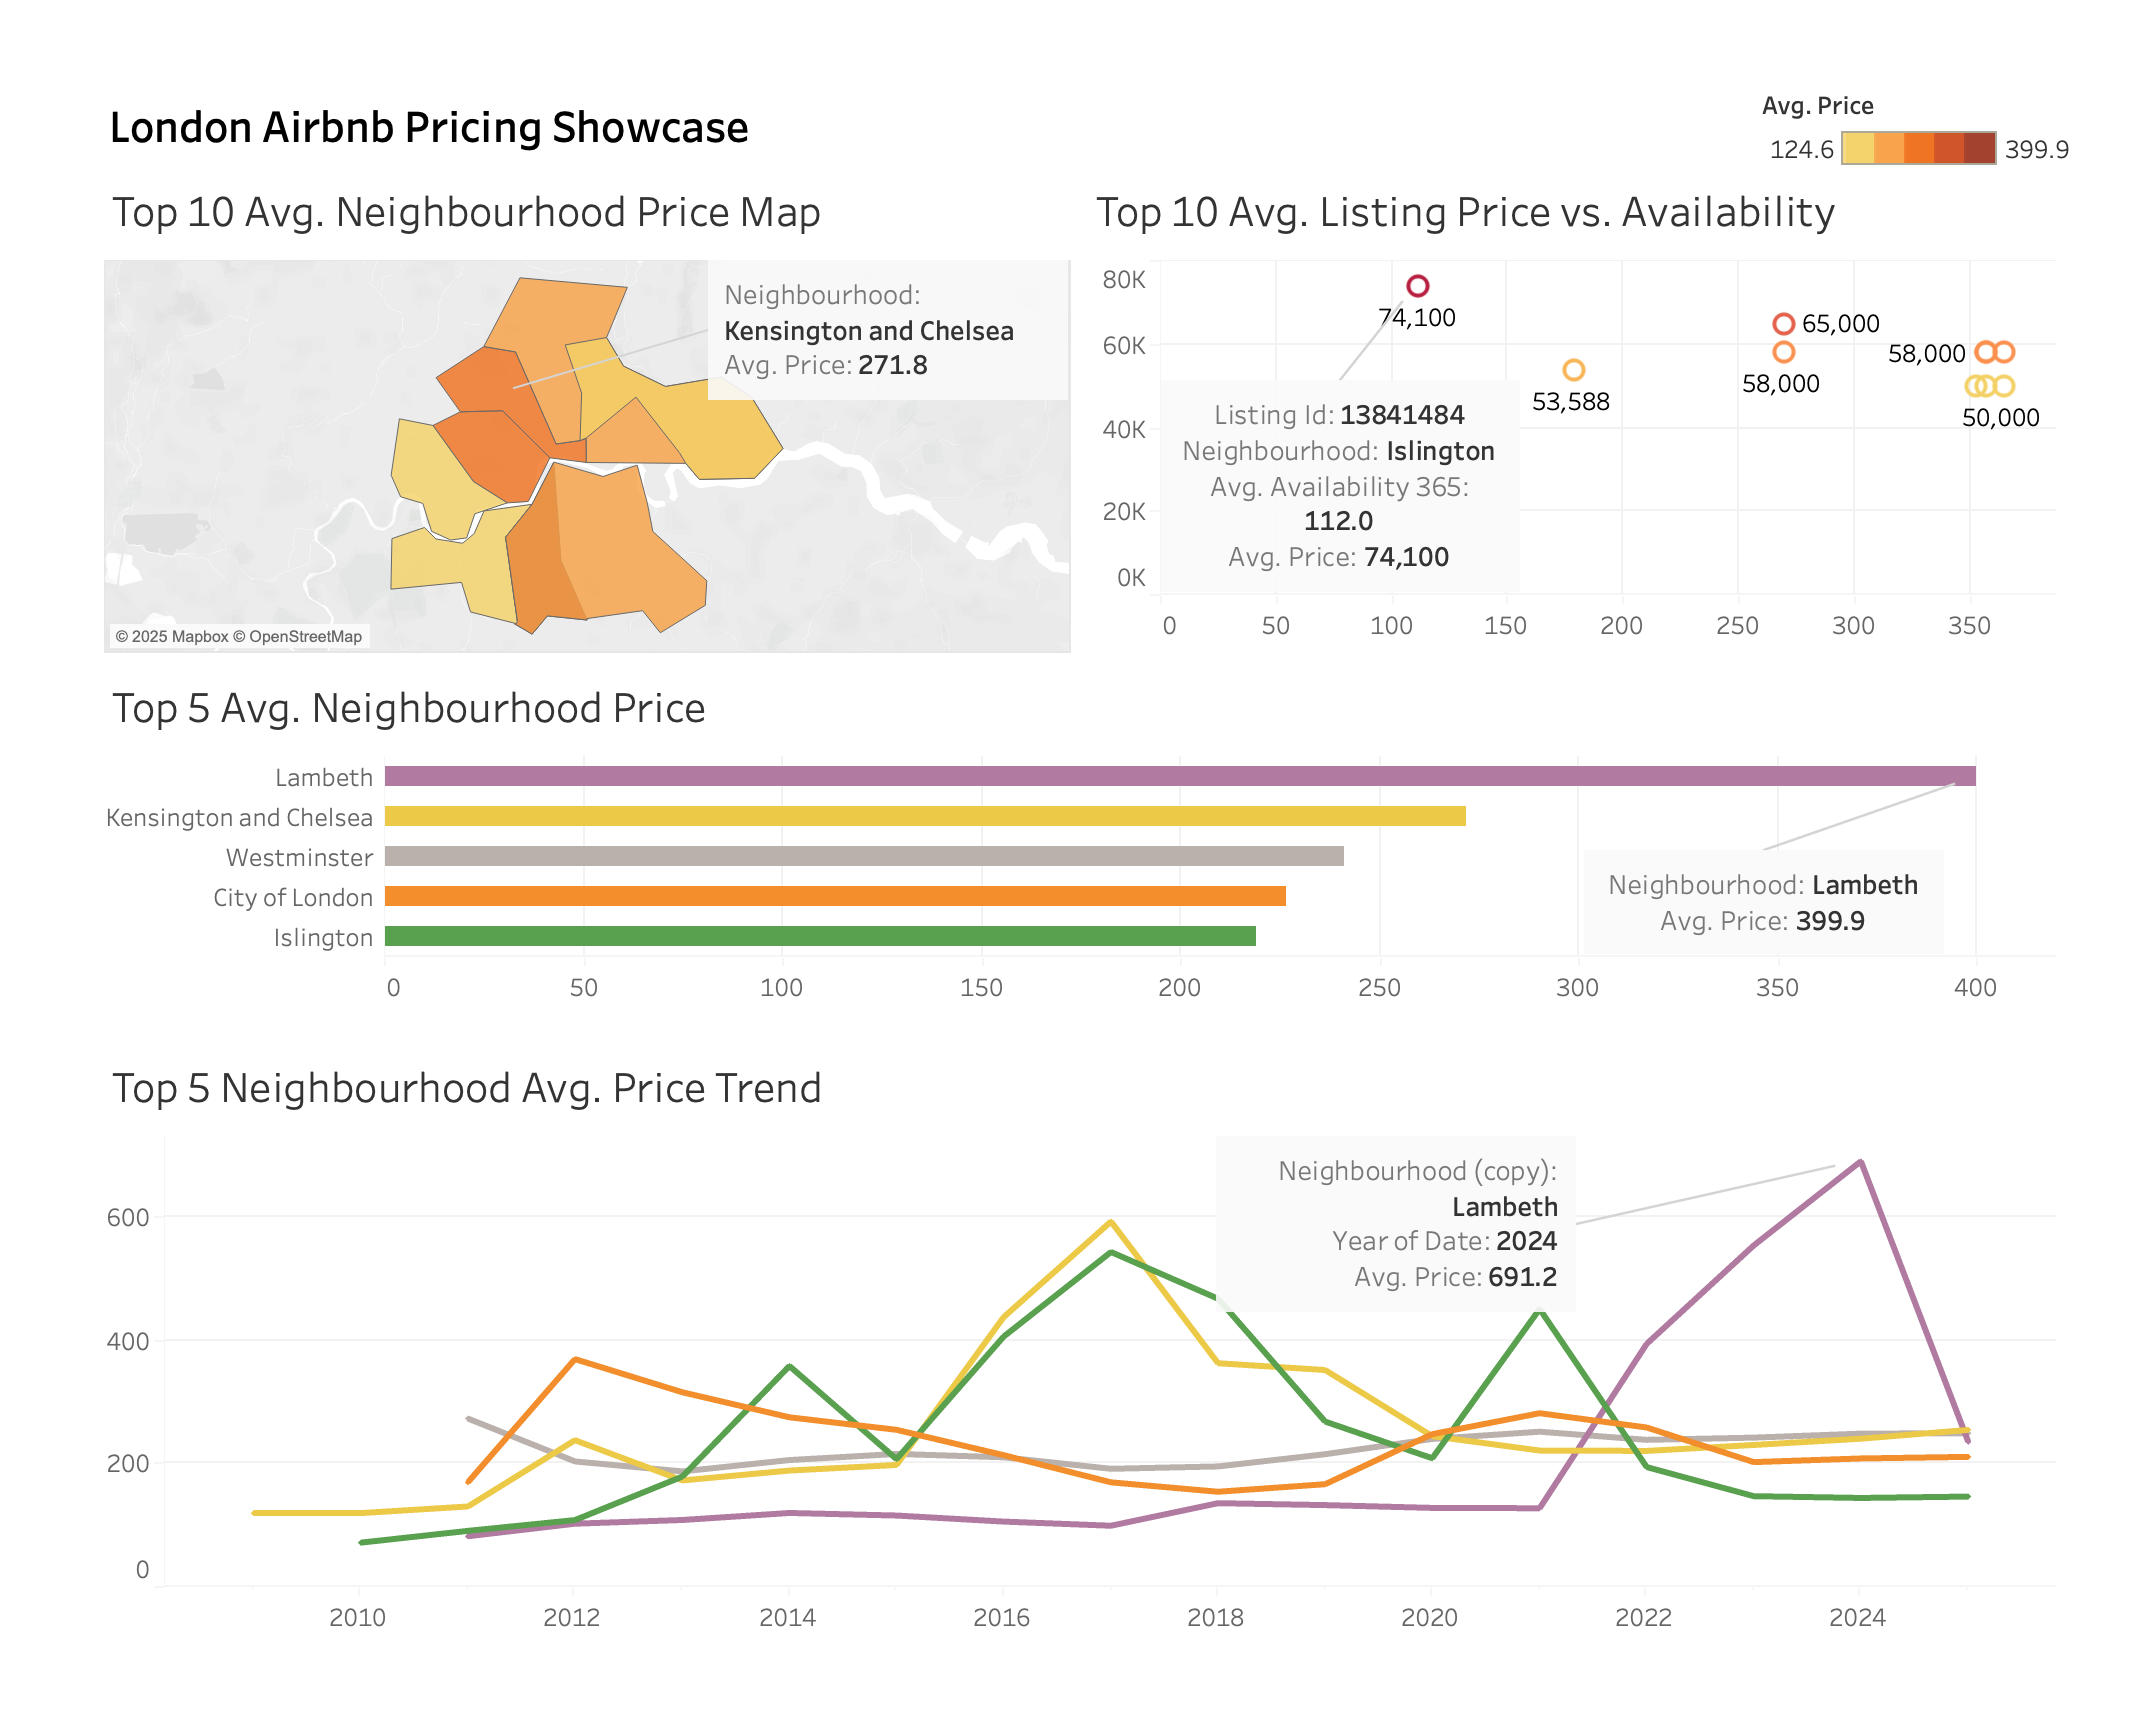

# **3. Data Cleaning**

While our dataset is comprehensive, it was not entirely clean and included some data irrelevant to our analysis. Our team completed the cleaning phase through the following steps.

## **NYC_listings**


We started by previewing the raw dataset to understand its structure, column types, and sample values.

In [ ]:
%%bigquery
SELECT *
FROM `ba775-fa25-b01.nyc_listings.nyc_listings`
LIMIT 1;

Query is running:   0%|          |

Downloading:   0%|          |

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,679793888125076039,Dream private room,471726877,Affo,Bronx,Allerton,40.86341,-73.865952,Private room,72,30,37,2023-09-04,0.96,1,365,0,None


Drop Columns: To prepare the dataset for analysis, we selected features aligned with our analytical objectives (location, price, room type, and review metrics) and dropped non-essential columns, including name, host_name, neighbourhood_group, last_review, and license.

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-fa25-b01.nyc_listings.nyc_listing_cleaned` AS
SELECT
    id,
    host_id,
    neighbourhood,
    latitude,
    longitude,
    room_type,
    price,
    minimum_nights,
    number_of_reviews,
    reviews_per_month,
    calculated_host_listings_count,
    availability_365,
    number_of_reviews_ltm
FROM `ba775-fa25-b01.nyc_listings.nyc_listings`;


Query is running:   0%|          |

""


In [ ]:
%%bigquery
SELECT *
FROM `ba775-fa25-b01.nyc_listings.nyc_listing_cleaned`
WHERE id IS NOT NULL
  AND host_id IS NOT NULL
  AND neighbourhood IS NOT NULL
  AND room_type IS NOT NULL
  AND price IS NOT NULL
  AND latitude IS NOT NULL
  AND longitude IS NOT NULL
  AND minimum_nights IS NOT NULL
  AND number_of_reviews IS NOT NULL
  AND reviews_per_month IS NOT NULL
  AND calculated_host_listings_count IS NOT NULL
  AND availability_365 IS NOT NULL
  AND number_of_reviews_ltm IS NOT NULL
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,759901,873273,Allerton,40.86660,-73.85532,Private room,77,30,49,0.31,1,270,0
1,17876530,11305944,Allerton,40.86762,-73.85688,Entire home/apt,208,30,166,1.61,3,182,0


Check missing values



In [ ]:
%%bigquery
SELECT
  COUNTIF(id IS NOT NULL) AS id_not_null,
  COUNTIF(host_id IS NOT NULL) AS host_id_not_null,
  COUNTIF(neighbourhood IS NOT NULL) AS neighbourhood_not_null,
  COUNTIF(latitude IS NOT NULL) AS latitude_not_null,
  COUNTIF(longitude IS NOT NULL) AS longitude_not_null,
  COUNTIF(room_type IS NOT NULL) AS room_type_not_null,
  COUNTIF(price IS NOT NULL) AS price_not_null,
  COUNTIF(minimum_nights IS NOT NULL) AS minimum_nights_not_null,
  COUNTIF(number_of_reviews IS NOT NULL) AS number_of_reviews_not_null,
  COUNTIF(reviews_per_month IS NOT NULL) AS reviews_per_month_not_null,
  COUNTIF(calculated_host_listings_count IS NOT NULL) AS listings_count_not_null,
  COUNTIF(availability_365 IS NOT NULL) AS availability_not_null
FROM ba775-fa25-b01.nyc_listings.nyc_listing_cleaned;

Query is running:   0%|          |

Downloading:   0%|          |

,id_not_null,host_id_not_null,neighbourhood_not_null,latitude_not_null,longitude_not_null,room_type_not_null,price_not_null,minimum_nights_not_null,number_of_reviews_not_null,reviews_per_month_not_null,listings_count_not_null,availability_not_null
0,36111,36111,36111,36111,36111,36111,21328,36111,36111,24923,36111,36111


## **NYC_Reviewing**

 Previewing the raw dataset to understand its structure, column types, and sample values.

In [ ]:
%%bigquery
SELECT *
FROM `ba775-fa25-b01.nyc_reviews.nyc_reviews`
LIMIT 1;

Query is running:   0%|          |

Downloading:   0%|          |

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6848,3149,2009-05-25,18003,Ken,Stayed with Allen and Irina about a year ago. ...


In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-fa25-b01.nyc_reviews.nyc_reviews_cleaned` AS
SELECT
  listing_id,
  date,
  comments
FROM `ba775-fa25-b01.nyc_reviews.nyc_reviews`;

Query is running:   0%|          |

""


Check missing values



In [ ]:
%%bigquery
SELECT
  COUNTIF(listing_id IS NOT NULL) AS null_listing_id,
  COUNTIF(date IS NOT NULL) AS null_date,
  COUNTIF(comments IS NOT NULL) AS null_comments
FROM `ba775-fa25-b01.nyc_reviews.nyc_reviews_cleaned`;

Query is running:   0%|          |

Downloading:   0%|          |

,null_listing_id,null_date,null_comments
0,986597,986597,986597


## **London_Listing**

 Previewing the raw dataset to understand its structure, column types, and sample values.

In [ ]:
%%bigquery
SELECT *
FROM `ba775-fa25-b01.london_listings.london_listings`
LIMIT 1;

Query is running:   0%|          |

Downloading:   0%|          |

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5811550,large room in Shoreditch,8317501,None,None,Tower Hamlets,51.52512,-0.06566,Private room,<NA>,1,0,NaT,NaN,1,0,0,None


Drop Columns: To prepare the dataset for analysis, we selected features aligned with our analytical objectives (location, price, room type, and review metrics) and dropped non-essential columns, including name, host_name, neighbourhood_group, last_review, and license.

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-fa25-b01.london_listings.london_listing_cleaned` AS
SELECT
    id,
    host_id,
    neighbourhood,
    latitude,
    longitude,
    room_type,
    price,
    minimum_nights,
    number_of_reviews,
    reviews_per_month,
    calculated_host_listings_count,
    availability_365,
    number_of_reviews_ltm
FROM `ba775-fa25-b01.london_listings.london_listings`;

Query is running:   0%|          |

""


In [ ]:
%%bigquery
SELECT *
FROM `ba775-fa25-b01.london_listings.london_listing_cleaned`
WHERE id IS NOT NULL
  AND host_id IS NOT NULL
  AND neighbourhood IS NOT NULL
  AND room_type IS NOT NULL
  AND price IS NOT NULL
  AND latitude IS NOT NULL
  AND longitude IS NOT NULL
  AND minimum_nights IS NOT NULL
  AND number_of_reviews IS NOT NULL
  AND reviews_per_month IS NOT NULL
  AND calculated_host_listings_count IS NOT NULL
  AND availability_365 IS NOT NULL
  AND number_of_reviews_ltm IS NOT NULL
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,32163082,233974961,Barking and Dagenham,51.55510,0.14922,Private room,32,7,1,0.01,4,363,0
1,31458024,235653875,Barking and Dagenham,51.53769,0.15341,Private room,86,1,1,0.01,1,179,0


Check missing values

In [ ]:
%%bigquery
SELECT
  COUNT(*) AS total_rows,
  COUNTIF(id IS NOT NULL) AS id_not_null,
  COUNTIF(host_id IS NOT NULL) AS host_id_not_null,
  COUNTIF(neighbourhood IS NOT NULL) AS neighbourhood_not_null,
  COUNTIF(room_type IS NOT NULL) AS room_type_not_null,
  COUNTIF(price IS NOT NULL) AS price_not_null,
  COUNTIF(latitude IS NOT NULL) AS latitude_not_null,
  COUNTIF(longitude IS NOT NULL) AS longitude_not_null,
  COUNTIF(minimum_nights IS NOT NULL) AS minimum_nights_not_null,
  COUNTIF(number_of_reviews IS NOT NULL) AS number_of_reviews_not_null,
  COUNTIF(reviews_per_month IS NOT NULL) AS reviews_per_month_not_null,
  COUNTIF(calculated_host_listings_count IS NOT NULL) AS listings_count_not_null,
  COUNTIF(availability_365 IS NOT NULL) AS availability_365_not_null,
  COUNTIF(number_of_reviews_ltm IS NOT NULL) AS reviews_ltm_not_null
FROM ba775-fa25-b01.london_listings.london_listing_cleaned

Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,id_not_null,host_id_not_null,neighbourhood_not_null,room_type_not_null,price_not_null,latitude_not_null,longitude_not_null,minimum_nights_not_null,number_of_reviews_not_null,reviews_per_month_not_null,listings_count_not_null,availability_365_not_null,reviews_ltm_not_null
0,96651,96651,96651,96651,96651,62684,96651,96651,96651,96651,71487,96651,96651,96651


## **London_review**





Previewing the raw dataset to understand its structure, column types, and sample values.

In [ ]:
%%bigquery
SELECT *
FROM `ba775-fa25-b01.london_reviews.london_reviews`
LIMIT 1;

Query is running:   0%|          |

Downloading:   0%|          |

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,34935,60504,2010-07-03,73626,Adeline,the room was clean and even better than expect...


In [ ]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-fa25-b01.london_reviews.london_reviews_cleaned` AS
SELECT
  listing_id,
  date,
  comments
FROM `ba775-fa25-b01.london_reviews.london_reviews`;

Query is running:   0%|          |

""


Check missing values

In [ ]:
%%bigquery
SELECT
  COUNTIF(listing_id IS NOT NULL) AS null_listing_id,
  COUNTIF(date IS NOT NULL) AS null_date,
  COUNTIF(comments IS NOT NULL) AS null_comments
FROM `ba775-fa25-b01.london_reviews.london_reviews`;

Query is running:   0%|          |

Downloading:   0%|          |

,null_listing_id,null_date,null_comments
0,2019207,2019207,2019207


#**4.  Joining Datasets**

To enable a unified analysis across listing attributes and review text, we performed a LEFT JOIN between the cleaned listing tables and the cleaned review tables for both cities (NYC and London).

The join was executed on listing_id, ensuring that every listing remains in the final dataset, even if no review text is available. This structure maintains full listing coverage while incorporating review comments where present.

## **NYC**

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
CREATE OR REPLACE TABLE `ba775-fa25-b01.nyc_listings.nyc_joined` AS
SELECT
  l.id AS listing_id,
  l.* EXCEPT(id),
  r.date,
  r.comments
FROM `ba775-fa25-b01.nyc_listings.nyc_listing_cleaned` AS l
LEFT JOIN `ba775-fa25-b01.nyc_reviews.nyc_reviews_cleaned` AS r
  ON l.id = r.listing_id;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
SELECT *
FROM `ba775-fa25-b01.nyc_listings.nyc_joined`
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,listing_id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,date,comments
0,11943,45445,Flatbush,40.63702,-73.96327,Private room,<NA>,30,0,NaN,1,0,0,NaT,None
1,45935,204586,Mott Haven,40.80635,-73.92201,Private room,60,30,0,NaN,1,263,0,NaT,None


## **London**

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
CREATE OR REPLACE TABLE `ba775-fa25-b01.london_listings.london_joined` AS
SELECT
  l.id AS listing_id,
  l.* EXCEPT(id),
  r.date,
  r.comments
FROM `ba775-fa25-b01.london_listings.london_listing_cleaned` AS l
LEFT JOIN `ba775-fa25-b01.london_reviews.london_reviews_cleaned` AS r
  ON l.id = r.listing_id;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
SELECT *
FROM `ba775-fa25-b01.london_listings.london_joined`
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,listing_id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,date,comments
0,296720,1530293,Merton,51.41877,-0.16772,Private room,<NA>,1,0,NaN,1,0,0,NaT,None
1,329610,1682825,Waltham Forest,51.56407,-0.01151,Private room,<NA>,1,0,NaN,1,0,0,NaT,None


# **5. Exploratory Analysis**

### Q1: How many listings are there in each city?  What’s the average price?

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
SELECT
  COUNT(*) AS n_listings,
  AVG(price) AS avg_price
FROM `ba775-fa25-b01.london_listings.london_listings`;


Query is running:   0%|          |

Downloading:   0%|          |

,n_listings,avg_price
0,96651,213.366058


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
SELECT
  COUNT(*) AS n_listings,
  AVG(price) AS avg_price
FROM `ba775-fa25-b01.nyc_listings.nyc_listings`;

Query is running:   0%|          |

Downloading:   0%|          |

,n_listings,avg_price
0,36111,680.526819


**Output:**

London -- 96651 listings with average price at 213.

NYC -- 36111 listings with average price at 681.


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
-- Separate by Room Type as well:

WITH city_room_price AS (
  SELECT
    'NYC' AS city,
    room_type,
    ROUND(AVG(price),2) AS avg_price
  FROM `ba775-fa25-b01.nyc_listings.nyc_joined`
  WHERE price IS NOT NULL
  GROUP BY room_type

  UNION ALL

  SELECT
    'London' AS city,
    room_type,
    ROUND(AVG(price),2) AS avg_price
  FROM `ba775-fa25-b01.london_listings.london_joined`
  WHERE price IS NOT NULL
  GROUP BY room_type
)

SELECT *
FROM city_room_price
ORDER BY room_type, city;

Query is running:   0%|          |

Downloading:   0%|          |

,city,room_type,avg_price
0,London,Entire home/apt,216.90
1,NYC,Entire home/apt,253.92
2,London,Hotel room,120.23
3,NYC,Hotel room,10477.82
4,London,Private room,116.44
5,NYC,Private room,173.63
6,London,Shared room,81.38
7,NYC,Shared room,183.28


**Answer:**


1.  London has a much larger Airbnb supply, keeping prices competitive.

    London has 96,651 listings, almost  three times more than NYC’s 36,111.
    A larger supply means hosts face more competition, which helps maintain lower and more stable prices.
    This indicates that London is a more mature and saturated market.
2.  NYC is significantly more expensive across all room types.

    NYC’s overall average price ($680) is more than three times London’s ($213).
    Even the cheapest categories (private rooms, shared rooms) are consistently pricier in NYC.

    NYC hotel-room prices show extreme outliers, pulling the average upward → indicates that High-end luxury listings dominate, pricing variance is very large and suggests NYC has a more polarized market we can look further into.

---


###Q2. Which neighbourhoods have the highest average prices in each city?

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
SELECT
  neighbourhood,
  COUNT(*) AS n_listings,
  AVG(price) AS avg_price
FROM `ba775-fa25-b01.london_listings.london_listings`
GROUP BY neighbourhood
HAVING n_listings > 30
ORDER BY avg_price DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,neighbourhood,n_listings,avg_price
0,City of London,578,379.090909
1,Lambeth,5168,369.843623
2,Kensington and Chelsea,6348,363.188002
3,Westminster,11367,345.318295
4,Camden,6564,231.094432
5,Islington,5064,218.092201
6,Hammersmith and Fulham,4145,193.992279
7,Wandsworth,4918,189.820619
8,Richmond upon Thames,1253,184.412060
9,Brent,3007,169.424111


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
SELECT
  neighbourhood,
  COUNT(*) AS n_listings,
  AVG(price) AS avg_price
FROM `ba775-fa25-b01.nyc_listings.nyc_listings`
GROUP BY neighbourhood
HAVING n_listings > 30
ORDER BY avg_price DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,neighbourhood,n_listings,avg_price
0,SoHo,269,3406.555556
1,Long Island City,417,2720.723735
2,Midtown,1993,2360.958684
3,Murray Hill,460,2299.964179
4,Lower East Side,619,2201.353846
5,Upper West Side,1458,1886.681107
6,Nolita,197,1796.104167
7,Chinatown,275,1676.520000
8,Hell's Kitchen,1496,1567.958932
9,Financial District,642,1338.211957


**Answer:**


London -- Kensington, Chelsea, Westminster, Camden

NYC -- Tribeca, SoHo, Chelsea, Midtown

1. The most expensive neighbourhoods in both cities are also their wealthiest districts and tend to cluster around central business districts and culturally significant zones. This shows a strong link between local housing markets and Airbnb price dynamics.

2. Even the top-tier London neighbourhoods are significantly cheaper than NYC’s.
New York shows sharper price peaks, while London’s distribution is more gradual.

3. Identifying high-price districts helps understand traveler segmentation and market structure. NYC caters more to luxury/business travelers, while London offers a wider, more accessible price range even in prime locations. Helps identify premium zones for investment, pricing strategy, and targeted marketing.

---


### Q3. Is there a relationship between listing price and availability?

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
SELECT
  CORR(price, availability_365) AS corr_price_availability
FROM `ba775-fa25-b01.london_listings.london_listings`;

SELECT
  CORR(price, availability_365) AS corr_price_availability
FROM `ba775-fa25-b01.nyc_listings.nyc_listings`;

Query is running:   0%|          |

Downloading:   0%|          |

,corr_price_availability
0,0.031779


**Answer:** The correlation between listing price and availability_365 is approximately 0.03. This suggests that pricing decisions do not systematically influence how available a property is, and conversely, that availability levels do not depend strongly on price. Other factors such as location, booking trends, and host behavior could be more likely to explain the variation in availability.

### Q4. How many hosts have more than one listing, do multi-listing hosts charge differently compared to single-listing hosts?

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
-- LONDON: number of single vs multi-listing hosts
WITH host_stats AS (
  SELECT
    host_id,
    COUNT(*) AS n_listings
  FROM `ba775-fa25-b01.london_listings.london_listings`
  GROUP BY host_id
)
SELECT
  COUNTIF(n_listings = 1) AS single_listing_hosts,
  COUNTIF(n_listings > 1) AS multi_listing_hosts,
  COUNT(*) AS total_hosts,
  SAFE_DIVIDE(COUNTIF(n_listings > 1), COUNT(*)) AS frac_hosts_multi
FROM host_stats;

Query is running:   0%|          |

Downloading:   0%|          |

,single_listing_hosts,multi_listing_hosts,total_hosts,frac_hosts_multi
0,44976,10828,55804,0.194036


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
WITH host_stats AS (
  SELECT
    host_id,
    COUNT(*) AS n_listings
  FROM `ba775-fa25-b01.nyc_listings.nyc_listings`
  GROUP BY host_id
)
SELECT
  COUNTIF(n_listings = 1) AS single_listing_hosts,
  COUNTIF(n_listings > 1) AS multi_listing_hosts,
  COUNT(*) AS total_hosts,
  SAFE_DIVIDE(COUNTIF(n_listings > 1), COUNT(*)) AS frac_hosts_multi
FROM host_stats;

Query is running:   0%|          |

Downloading:   0%|          |

,single_listing_hosts,multi_listing_hosts,total_hosts,frac_hosts_multi
0,17905,3477,21382,0.162613


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
WITH host_stats AS (
  SELECT
    host_id,
    COUNT(*) AS n_listings
  FROM `ba775-fa25-b01.london_listings.london_listings`
  GROUP BY host_id
)
SELECT
  SUM(n_listings) AS total_listings,
  SUM(CASE WHEN n_listings > 1 THEN n_listings ELSE 0 END) AS listings_from_multi_hosts,
  SAFE_DIVIDE(
    SUM(CASE WHEN n_listings > 1 THEN n_listings ELSE 0 END),
    SUM(n_listings)
  ) AS frac_listings_from_multi_hosts
FROM host_stats;

Query is running:   0%|          |

Downloading:   0%|          |

,total_listings,listings_from_multi_hosts,frac_listings_from_multi_hosts
0,96651,51675,0.534656


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
WITH host_stats AS (
  SELECT
    host_id,
    COUNT(*) AS n_listings
  FROM `ba775-fa25-b01.nyc_listings.nyc_listings`
  GROUP BY host_id
)
SELECT
  SUM(n_listings) AS total_listings,
  SUM(CASE WHEN n_listings > 1 THEN n_listings ELSE 0 END) AS listings_from_multi_hosts,
  SAFE_DIVIDE(
    SUM(CASE WHEN n_listings > 1 THEN n_listings ELSE 0 END),
    SUM(n_listings)
  ) AS frac_listings_from_multi_hosts
FROM host_stats;

Query is running:   0%|          |

Downloading:   0%|          |

,total_listings,listings_from_multi_hosts,frac_listings_from_multi_hosts
0,36111,18206,0.504168


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
-- LONDON price comparison
WITH host_stats AS (
  SELECT
    host_id,
    COUNT(*) AS n_listings
  FROM `ba775-fa25-b01.london_listings.london_listings`
  GROUP BY host_id
),
listings_with_type AS (
  SELECT
    l.*,
    CASE
      WHEN h.n_listings > 1 THEN 'multi'
      ELSE 'single'
    END AS host_type
  FROM `ba775-fa25-b01.london_listings.london_listings` AS l
  JOIN host_stats AS h
  USING (host_id)
)
SELECT
  host_type,
  COUNT(*) AS n_listings,
  AVG(price) AS avg_price,
  APPROX_QUANTILES(price, 2)[OFFSET(1)] AS median_price
FROM listings_with_type
GROUP BY host_type;

Query is running:   0%|          |

Downloading:   0%|          |

,host_type,n_listings,avg_price,median_price
0,single,44976,172.991100,117
1,multi,51675,235.927561,145


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
WITH host_stats AS (
  SELECT
    host_id,
    COUNT(*) AS n_listings
  FROM `ba775-fa25-b01.nyc_listings.nyc_listings`
  GROUP BY host_id
),
listings_with_type AS (
  SELECT
    l.*,
    CASE
      WHEN h.n_listings > 1 THEN 'multi'
      ELSE 'single'
    END AS host_type
  FROM `ba775-fa25-b01.nyc_listings.nyc_listings` AS l
  JOIN host_stats AS h
  USING (host_id)
)
SELECT
  host_type,
  COUNT(*) AS n_listings,
  AVG(price) AS avg_price,
  APPROX_QUANTILES(price, 2)[OFFSET(1)] AS median_price
FROM listings_with_type
GROUP BY host_type;

Query is running:   0%|          |

Downloading:   0%|          |

,host_type,n_listings,avg_price,median_price
0,single,17905,218.940096,151
1,multi,18206,940.217965,155


**Answer:**

* How many hosts have more than one listing?
  * London, 44,976 single-listing hosts, 10,828 multi-listing hosts, Total hosts = 55,804, 19.4% of hosts have more than one listing.
  * New York City, 17,905 single-listing hosts, 3,477 multi-listing hosts, Total hosts = 21,382, 16.3% of hosts have more than one listing.
* Do multi-listing hosts charge differently compared to single-listing hosts?
  * In London, multi-listing hosts clearly charge more, median price is £28 higher, average price is £63 higher.
  * In NYC, multi-listing hosts raise the average a lot, but the median listing is priced very similarly.Median price is $4 higher. Average price jumps $785.

---




##Analyzing by Holidays

###Q5: How do average prices differ between NYC and London during holidays such as Christmas/New Year?

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
-- NYC
SELECT
  'NYC' AS city,
  ROUND(AVG(
      IF(
        (EXTRACT(MONTH FROM date) = 12 AND EXTRACT(DAY FROM date) >= 20)
        OR (EXTRACT(MONTH FROM date) = 1  AND EXTRACT(DAY FROM date) <= 5),
        price, NULL)), 2) AS avg_price_christmas_newyear,
  ROUND(AVG(
      IF(NOT (
          (EXTRACT(MONTH FROM date) = 12 AND EXTRACT(DAY FROM date) >= 20)
          OR (EXTRACT(MONTH FROM date) = 1  AND EXTRACT(DAY FROM date) <= 5)),
        price, NULL)), 2) AS avg_price_other_dates
FROM `ba775-fa25-b01.nyc_listings.nyc_joined`
WHERE price IS NOT NULL

UNION ALL

-- LONDON
SELECT
  'London' AS city,
  ROUND(AVG(
      IF(
        (EXTRACT(MONTH FROM date) = 12 AND EXTRACT(DAY FROM date) >= 20)
        OR (EXTRACT(MONTH FROM date) = 1  AND EXTRACT(DAY FROM date) <= 5),
        price * 1.25, NULL)), 2) AS avg_price_christmas_newyear,
  ROUND(AVG(
      IF(NOT (
          (EXTRACT(MONTH FROM date) = 12 AND EXTRACT(DAY FROM date) >= 20)
          OR (EXTRACT(MONTH FROM date) = 1  AND EXTRACT(DAY FROM date) <= 5)),
        price * 1.25, NULL)),
    2) AS avg_price_other_dates
FROM `ba775-fa25-b01.london_listings.london_joined`
WHERE price IS NOT NULL;


Query is running:   0%|          |

Downloading:   0%|          |

,city,avg_price_christmas_newyear,avg_price_other_dates
0,NYC,239.25,229.67
1,London,227.49,211.18


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
-- separate columns for holidays, break, and others
-- NYC
SELECT
  'NYC' AS city,

  -- Christmas/New Year (Dec 20–31 and Jan 1–5)
  ROUND(AVG(
      IF(
        (EXTRACT(MONTH FROM date) = 12 AND EXTRACT(DAY FROM date) >= 20)
        OR (EXTRACT(MONTH FROM date) = 1  AND EXTRACT(DAY FROM date) <= 5),
        price, NULL
      )), 2) AS avg_price_christmas_newyear,

  -- Summer break (May–Aug)
  ROUND(AVG(
      IF(
        EXTRACT(MONTH FROM date) BETWEEN 5 AND 8,
        price,
        NULL)), 2) AS avg_price_summer,

  -- All other dates (not Christmas/New Year and not Summer)
  ROUND(AVG(
      IF(NOT (
          (
            (EXTRACT(MONTH FROM date) = 12 AND EXTRACT(DAY FROM date) >= 20)
            OR (EXTRACT(MONTH FROM date) = 1  AND EXTRACT(DAY FROM date) <= 5)
            )
          OR
          (EXTRACT(MONTH FROM date) BETWEEN 5 AND 8)),
        price, NULL)), 2) AS avg_price_other_dates

FROM `ba775-fa25-b01.nyc_listings.nyc_joined`
WHERE price IS NOT NULL

UNION ALL

-- LONDON, prices in Euros converted to USD
SELECT
  'London' AS city,

  ROUND(AVG(
      IF(
        (EXTRACT(MONTH FROM date) = 12 AND EXTRACT(DAY FROM date) >= 20)
        OR (EXTRACT(MONTH FROM date) = 1  AND EXTRACT(DAY FROM date) <= 5),
        price * 1.25, NULL)),
        2) AS avg_price_christmas_newyear,

  ROUND(AVG(
      IF(
        EXTRACT(MONTH FROM date) BETWEEN 5 AND 8,
        price * 1.25, NULL)),
        2) AS avg_price_summer,

  ROUND(AVG(
      IF(NOT((
            (EXTRACT(MONTH FROM date) = 12 AND EXTRACT(DAY FROM date) >= 20)
            OR (EXTRACT(MONTH FROM date) = 1  AND EXTRACT(DAY FROM date) <= 5))
          OR
          (EXTRACT(MONTH FROM date) BETWEEN 5 AND 8)),
        price * 1.25, NULL)),
        2) AS avg_price_other_dates

FROM `ba775-fa25-b01.london_listings.london_joined`
WHERE price IS NOT NULL;

Query is running:   0%|          |

Downloading:   0%|          |

,city,avg_price_christmas_newyear,avg_price_summer,avg_price_other_dates
0,NYC,239.25,237.64,224.19
1,London,227.49,206.95,213.87


**Answer:** In order to provide the most accurate analysis, we converted GBP to US Dollars for the London dataset. During Christmas and New Year, NYC’s average price is `$239.25`, while London’s converted price is `$227.49`, resulting in a modest difference of about `$12` per night. This suggests that both cities experience elevated demand during the holiday season, with NYC being slightly more expensive.

A similar pattern appears during Summer Break (May–August). NYC’s average price is `$237.64`, compared to London’s `$206.95`, a difference of about `$31`. While NYC still maintains higher prices on average, the gap is not especially large and is smaller than typical expectations. Across non-holiday dates, the difference narrows even further, with NYC averaging `$224.19` compared to London’s `$213.87`. Overall, NYC and London show more comparable pricing levels, with NYC consistently a bit more expensive throughout the year.


---



### Q6. Are there more reviews around holidays/breaks? Explore time periods around Christmas/New Years, and Summer breaks.

London's output

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
WITH daily AS (
  -- Count comments per day
  SELECT
    DATE(r.date) AS review_date,
    COUNT(*) AS comments_per_day
  FROM `ba775-fa25-b01.london_listings.london_joined` AS r
  WHERE r.date IS NOT NULL
  GROUP BY review_date
),

tagged AS (
  -- Tag holiday vs normal
  SELECT
    review_date,
    comments_per_day,
    CASE
      WHEN (EXTRACT(MONTH FROM review_date) = 12 AND EXTRACT(DAY FROM review_date) >= 20)
        OR (EXTRACT(MONTH FROM review_date) = 1 AND EXTRACT(DAY FROM review_date) <= 5)
      THEN 'Winter Break'
      ELSE 'normal'
    END AS period
  FROM daily
)

SELECT
  period,
  SUM(comments_per_day) AS total_comments,
  COUNT(*) AS total_days,
  SUM(comments_per_day) * 1.0 / COUNT(*) AS avg_comments_per_day
FROM tagged
GROUP BY period;


Query is running:   0%|          |

Downloading:   0%|          |

,period,total_comments,total_days,avg_comments_per_day
0,Winter Break,93106,244,381.581967
1,normal,1926101,4997,385.451471


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
WITH daily AS (
  -- Count comments per day
  SELECT
    DATE(r.date) AS review_date,
    COUNT(*) AS comments_per_day
  FROM `ba775-fa25-b01.london_listings.london_joined` AS r
  WHERE r.date IS NOT NULL
  GROUP BY review_date
),

tagged AS (
  -- Tag holiday vs normal
  SELECT
    review_date,
    comments_per_day,
    CASE
      WHEN (EXTRACT(MONTH FROM review_date) = 5
      OR EXTRACT(MONTH FROM review_date) = 6
      OR EXTRACT(MONTH FROM review_date) = 7
      OR EXTRACT(MONTH FROM review_date) = 8)
      THEN 'Summer Break'
      ELSE 'normal'
    END AS period
  FROM daily
)

SELECT
  period,
  SUM(comments_per_day) AS total_comments,
  COUNT(*) AS total_days,
  SUM(comments_per_day) * 1.0 / COUNT(*) AS avg_comments_per_day
FROM tagged
GROUP BY period;


Query is running:   0%|          |

Downloading:   0%|          |

,period,total_comments,total_days,avg_comments_per_day
0,normal,1263776,3490,362.113467
1,Summer Break,755431,1751,431.428327


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
WITH daily AS (
  SELECT
    DATE(r.date) AS review_date,
    COUNT(*) AS comments_per_day
  FROM `ba775-fa25-b01.london_listings.london_joined` AS r
  WHERE r.date IS NOT NULL
  GROUP BY review_date
),

tagged AS (
  SELECT
    review_date,
    comments_per_day,
    CASE
      WHEN (EXTRACT(MONTH FROM review_date) = 5
      OR EXTRACT(MONTH FROM review_date) = 6
      OR EXTRACT(MONTH FROM review_date) = 7
      OR EXTRACT(MONTH FROM review_date) = 8)
      THEN 'Summer Break'
      WHEN (EXTRACT(MONTH FROM review_date) = 12 AND EXTRACT(DAY FROM review_date) >= 20)
        OR (EXTRACT(MONTH FROM review_date) = 1 AND EXTRACT(DAY FROM review_date) <= 5)
      THEN 'Winter Break'
      ELSE 'normal'
    END AS period
  FROM daily
)

SELECT
  period,
  SUM(comments_per_day) AS total_comments,
  COUNT(*) AS total_days,
  SUM(comments_per_day) * 1.0 / COUNT(*) AS avg_comments_per_day
FROM tagged
GROUP BY period;


Query is running:   0%|          |

Downloading:   0%|          |

,period,total_comments,total_days,avg_comments_per_day
0,Winter Break,93106,244,381.581967
1,Summer Break,755431,1751,431.428327
2,normal,1170670,3246,360.650031


New York's output

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
WITH daily AS (
  -- Count comments per day
  SELECT
    DATE(r.date) AS review_date,
    COUNT(*) AS comments_per_day
  FROM `ba775-fa25-b01.nyc_listings.nyc_joined` AS r
  WHERE r.date IS NOT NULL
  GROUP BY review_date
),

tagged AS (
  -- Tag holiday vs normal
  SELECT
    review_date,
    comments_per_day,
    CASE
      WHEN (EXTRACT(MONTH FROM review_date) = 12 AND EXTRACT(DAY FROM review_date) >= 20)
        OR (EXTRACT(MONTH FROM review_date) = 1 AND EXTRACT(DAY FROM review_date) <= 5)
      THEN 'holiday'
      ELSE 'normal'
    END AS period
  FROM daily
)

SELECT
  period,
  SUM(comments_per_day) AS total_comments,
  COUNT(*) AS total_days,
  SUM(comments_per_day) * 1.0 / COUNT(*) AS avg_comments_per_day
FROM tagged
GROUP BY period;


Query is running:   0%|          |

Downloading:   0%|          |

,period,total_comments,total_days,avg_comments_per_day
0,normal,939762,5322,176.580609
1,holiday,46835,258,181.531008


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
WITH daily AS (
  -- Count comments per day
  SELECT
    DATE(r.date) AS review_date,
    COUNT(*) AS comments_per_day
  FROM `ba775-fa25-b01.nyc_listings.nyc_joined` AS r
  WHERE r.date IS NOT NULL
  GROUP BY review_date
),

tagged AS (
  -- Tag holiday vs normal
  SELECT
    review_date,
    comments_per_day,
    CASE
      WHEN (EXTRACT(MONTH FROM review_date) = 5
      OR EXTRACT(MONTH FROM review_date) = 6
      OR EXTRACT(MONTH FROM review_date) = 7
      OR EXTRACT(MONTH FROM review_date) = 8)
      THEN 'Summer Break'
      ELSE 'normal'
    END AS period
  FROM daily
)

SELECT
  period,
  SUM(comments_per_day) AS total_comments,
  COUNT(*) AS total_days,
  SUM(comments_per_day) * 1.0 / COUNT(*) AS avg_comments_per_day
FROM tagged
GROUP BY period;


Query is running:   0%|          |

Downloading:   0%|          |

,period,total_comments,total_days,avg_comments_per_day
0,Summer Break,381082,1924,198.067568
1,normal,605515,3656,165.622265


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
WITH daily AS (
  SELECT
    DATE(r.date) AS review_date,
    COUNT(*) AS comments_per_day
  FROM `ba775-fa25-b01.nyc_listings.nyc_joined` AS r
  WHERE r.date IS NOT NULL
  GROUP BY review_date
),

tagged AS (
  SELECT
    review_date,
    comments_per_day,
    CASE
      WHEN (EXTRACT(MONTH FROM review_date) = 12 AND EXTRACT(DAY FROM review_date) >= 20)
        OR (EXTRACT(MONTH FROM review_date) = 1 AND EXTRACT(DAY FROM review_date) <= 5)
      THEN 'Winter Break'
       WHEN (EXTRACT(MONTH FROM review_date) = 5
      OR EXTRACT(MONTH FROM review_date) = 6
      OR EXTRACT(MONTH FROM review_date) = 7
      OR EXTRACT(MONTH FROM review_date) = 8)
      THEN 'Summer Break'
      ELSE 'normal'
    END AS period
  FROM daily
)

SELECT
  period,
  SUM(comments_per_day) AS total_comments,
  COUNT(*) AS total_days,
  SUM(comments_per_day) * 1.0 / COUNT(*) AS avg_comments_per_day
FROM tagged
GROUP BY period;


Query is running:   0%|          |

Downloading:   0%|          |

,period,total_comments,total_days,avg_comments_per_day
0,Summer Break,381082,1924,198.067568
1,normal,558680,3398,164.414361
2,Winter Break,46835,258,181.531008


**Answer**:
Overall, the results show clear seasonal patterns in guest reviews. Summer break consistently generates the highest average number of daily comments in both London and New York, suggesting strong travel activity during that period. Winter break shows mixed behavior: New York experiences more comments, while London sees fewer. When comparing all periods together, summer has the most engagement, followed by winter, with normal days having the least. Across the full dataset, London also tends to have a higher average number of comments than New York.

* Seasonality strongly affects guest engagement.
Summer is the peak period for guest activity in both cities, likely driven by higher travel volumes and tourism events.

* Winter Break impacts cities differently.
Higher winter-break comments in New York may reflect holiday tourism, while London may experience more locals and fewer active reviewers.

* London consistently attracts more engagement.
The higher average comment volume suggests London listings may have more guests, more active reviewers, or host more review-friendly accommodations.

* Review patterns align with travel patterns.
Periods associated with increased travel (summer and holiday seasons) naturally produce more reviews, confirming guest activity follows tourism demand.

---



### Q7. During holidays, are guest reviews more positive or negative compared to regular days?

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
WITH tagged AS (
  SELECT
    DATE(date) AS review_date,
    comments,
    CASE
      WHEN EXTRACT(MONTH FROM DATE(date)) IN (5, 6, 7, 8)
        THEN 'Summer Break'
      WHEN (EXTRACT(MONTH FROM DATE(date)) = 12 AND EXTRACT(DAY FROM DATE(date)) >= 20)
        OR (EXTRACT(MONTH FROM DATE(date)) = 1 AND EXTRACT(DAY FROM DATE(date)) <= 5)
        THEN 'Winter Break'
      ELSE 'normal'
    END AS period
  FROM `ba775-fa25-b01.london_listings.london_joined`
  WHERE comments IS NOT NULL
),

sentiment AS (
  SELECT
    period,
    comments,
    CASE WHEN
      LOWER(comments) LIKE '%good%' OR
      LOWER(comments) LIKE '%nice%' OR
      LOWER(comments) LIKE '%great%' OR
      LOWER(comments) LIKE '%excellent%' OR
      LOWER(comments) LIKE '%amazing%'
    THEN 1 ELSE 0 END AS positive_flag,
    CASE WHEN
      LOWER(comments) LIKE '%bad%' OR
      LOWER(comments) LIKE '%terrible%' OR
      LOWER(comments) LIKE '%poor%' OR
      LOWER(comments) LIKE '%horrible%' OR
      LOWER(comments) LIKE '%dirty%'
    THEN 1 ELSE 0 END AS negative_flag
  FROM tagged
)

SELECT
  period,
  COUNT(*) AS total_reviews,
  SUM(positive_flag) AS positive_reviews,
  SUM(negative_flag) AS negative_reviews,
  SAFE_DIVIDE(SUM(positive_flag), COUNT(*)) AS pct_positive,
  SAFE_DIVIDE(SUM(negative_flag), COUNT(*)) AS pct_negative
FROM sentiment
GROUP BY period;


Query is running:   0%|          |

Downloading:   0%|          |

,period,total_reviews,positive_reviews,negative_reviews,pct_positive,pct_negative
0,Winter Break,93106,48802,1632,0.524155,0.017528
1,normal,1170670,666202,18742,0.569078,0.016010
2,Summer Break,755431,442911,12148,0.586302,0.016081


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
WITH tagged AS (
  SELECT
    DATE(date) AS review_date,
    comments,
    CASE
      WHEN EXTRACT(MONTH FROM DATE(date)) IN (5, 6, 7, 8)
        THEN 'Summer Break'
      WHEN (EXTRACT(MONTH FROM DATE(date)) = 12 AND EXTRACT(DAY FROM DATE(date)) >= 20)
        OR (EXTRACT(MONTH FROM DATE(date)) = 1 AND EXTRACT(DAY FROM DATE(date)) <= 5)
        THEN 'Winter Break'
      ELSE 'normal'
    END AS period
  FROM `ba775-fa25-b01.nyc_listings.nyc_joined`
  WHERE comments IS NOT NULL
),

sentiment AS (
  SELECT
    period,
    comments,
    CASE WHEN
      LOWER(comments) LIKE '%good%' OR
      LOWER(comments) LIKE '%nice%' OR
      LOWER(comments) LIKE '%great%' OR
      LOWER(comments) LIKE '%excellent%' OR
      LOWER(comments) LIKE '%amazing%'
    THEN 1 ELSE 0 END AS positive_flag,
    CASE WHEN
      LOWER(comments) LIKE '%bad%' OR
      LOWER(comments) LIKE '%terrible%' OR
      LOWER(comments) LIKE '%poor%' OR
      LOWER(comments) LIKE '%horrible%' OR
      LOWER(comments) LIKE '%dirty%'
    THEN 1 ELSE 0 END AS negative_flag
  FROM tagged
)

SELECT
  period,
  COUNT(*) AS total_reviews,
  SUM(positive_flag) AS positive_reviews,
  SUM(negative_flag) AS negative_reviews,
  SAFE_DIVIDE(SUM(positive_flag), COUNT(*)) AS pct_positive,
  SAFE_DIVIDE(SUM(negative_flag), COUNT(*)) AS pct_negative
FROM sentiment
GROUP BY period;


Query is running:   0%|          |

Downloading:   0%|          |

,period,total_reviews,positive_reviews,negative_reviews,pct_positive,pct_negative
0,Summer Break,381082,237155,6353,0.622320,0.016671
1,normal,558680,346982,8798,0.621075,0.015748
2,Winter Break,46835,28963,760,0.618405,0.016227


**Answer**:
The sentiment analysis shows that both cities experience their highest share of positive reviews during the summer, with New York maintaining slightly higher positivity levels overall. In London, summer break reviews are the most positive, while winter break shows the lowest positivity and the highest negativity, suggesting guest experiences may decline slightly during the holiday season. New York’s sentiment remains relatively stable across all periods, with only small differences between summer, winter, and normal days. Overall, summer brings the strongest positive sentiment in both cities, winter break shows a dip—especially in London—and New York generally maintains more consistently positive reviews across all periods.

* Summer improves guest satisfaction in both cities.
Both London and New York reach their highest positivity during summer break, suggesting better guest experiences or lighter traveler stress during peak tourism months.

* London’s winter reviews decline noticeably.
London’s positivity drops the most during winter break and shows its highest negativity rate, indicating that holiday travel or seasonal factors may reduce guest satisfaction.

* New York shows more stable sentiment across seasons.
New York’s positivity stays relatively consistent from normal periods to winter break, implying stronger year-round service levels or less seasonal disruption.

* New York maintains higher overall positivity.
Across all periods, New York’s reviews contain a higher proportion of positive keywords than London’s, reflecting potentially stronger guest satisfaction or more expressive reviewers.

* Seasonality affects London more than New York.
The sentiment swings between periods are larger in London than in New York, suggesting New York’s travel environment or hospitality services may be more resilient to seasonal changes.


---



###Q8: Which neighbourhoods have the highest average prices in each city?

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
--NYC Which neighbourhoods have the highest average prices in each city?
WITH nyc_listing_distinct AS (
  SELECT DISTINCT
    listing_id,
    neighbourhood,
    price
  FROM `ba775-fa25-b01.nyc_listings.nyc_joined`
)

SELECT
  neighbourhood,
  ROUND(AVG(price), 2) AS avg_price
FROM nyc_listing_distinct
GROUP BY neighbourhood
ORDER BY avg_price DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,neighbourhood,avg_price
0,SoHo,3406.56
1,Long Island City,2720.72
2,Midtown,2360.96
3,Murray Hill,2299.96
4,Lower East Side,2201.35


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
--LONDON Which neighbourhoods have the highest average prices in each city?
WITH london_listing_distinct AS (
  SELECT DISTINCT
    listing_id,
    neighbourhood,
    price
  FROM `ba775-fa25-b01.london_listings.london_joined`
)

SELECT
  neighbourhood,
  ROUND(AVG(price), 2) AS avg_price
FROM london_listing_distinct
GROUP BY neighbourhood
ORDER BY avg_price DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,neighbourhood,avg_price
0,City of London,379.09
1,Lambeth,369.84
2,Kensington and Chelsea,363.19
3,Westminster,345.32
4,Camden,231.09


Answer:

1. The most expensive neighbourhoods in both cities are also their wealthiest districts and tend to cluster around central business districts and culturally significant zones. This shows a strong link between local housing markets and Airbnb price dynamics.

2. Even the top-tier London neighbourhoods are significantly cheaper than NYC’s.
New York shows sharper price peaks, while London’s distribution is more gradual.

3. Identifying high-price districts helps understand traveler segmentation and market structure. NYC caters more to luxury/business travelers, while London offers a wider, more accessible price range even in prime locations. Helps identify premium zones for investment, pricing strategy, and targeted marketing.

---


### Q9  & Q10: Which city has higher overall review activity? What percentage of reviews are negative (e.g., 'dirty', 'noisy') or positive (e.g., 'clean', 'friendly')?


In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
WITH combined AS (

  SELECT
    'NYC' AS city,
    listing_id,
    comments,
    REGEXP_CONTAINS(
      LOWER(comments),
      r'(great|good|friendly|clean|homely|comfortable|cozy|convenient|amazing|wonderful|excellent|perfect|nice|helpful|lovely|quiet|beautiful|spacious|safe|awesome|kind|welcoming|fantastic|recommend|pleasant|enjoyed|easy|location|responsive|thoughtful|accommodating|highly recommend|peaceful|walkable|central|close to subway|exceeded expectations|supportive|quickly|confortable|enjoyable|excelente|exellent|welcome|beyond expectation)'
    ) AS is_positive,

    REGEXP_CONTAINS(
      LOWER(comments),
      r'(bad|dirty|old|dusty|stained|smelly|mold|bugs|hair|unhygienic|filthy|noisy|loud|thin walls|traffic noise|construction|poor|unresponsive|rude|late|unclear|no reply|bad communication|broken|not working|cold|hot|uncomfortable|outdated|poor condition|unsafe|sketchy|scary|dark|bad neighborhood|disappointing|misleading|false photos|not as described|overpriced|small|cramped|dirty towels|bad smell|no privacy|inconvenient)'
    ) AS is_negative

  FROM `ba775-fa25-b01.nyc_listings.nyc_joined`
  WHERE comments IS NOT NULL


  UNION ALL

  SELECT
    'London' AS city,
    listing_id,
    comments,

    REGEXP_CONTAINS(
      LOWER(comments),
      r'(great|good|friendly|clean|homely|comfortable|cozy|convenient|amazing|wonderful|excellent|perfect|nice|helpful|lovely|quiet|beautiful|spacious|safe|awesome|kind|welcoming|fantastic|recommend|pleasant|enjoyed|easy|location|responsive|thoughtful|accommodating|highly recommend|peaceful|walkable|central|close to subway|exceeded expectations|supportive|quickly|confortable|enjoyable|excelente|exellent|welcome|beyond expectation)'
    ) AS is_positive,

    REGEXP_CONTAINS(
      LOWER(comments),
      r'(bad|dirty|old|dusty|stained|smelly|mold|bugs|hair|unhygienic|filthy|noisy|loud|thin walls|traffic noise|construction|poor|unresponsive|rude|late|unclear|no reply|bad communication|broken|not working|cold|hot|uncomfortable|outdated|poor condition|unsafe|sketchy|scary|dark|bad neighborhood|disappointing|misleading|false photos|not as described|overpriced|small|cramped|dirty towels|bad smell|no privacy|inconvenient)'
    ) AS is_negative

  FROM `ba775-fa25-b01.london_listings.london_joined`
  WHERE comments IS NOT NULL
),

classified AS (
  SELECT
    city,
    listing_id,
    comments,
    is_positive,
    is_negative,
    CASE
      WHEN is_positive AND NOT is_negative THEN 'positive_only'
      WHEN is_negative AND NOT is_positive THEN 'negative_only'
      WHEN is_positive AND is_negative THEN 'mixed'
      ELSE 'neutral'
    END AS review_type
  FROM combined
),


city_summary AS (
  SELECT
    city,
    COUNT(*) AS total_reviews,
    COUNT(DISTINCT listing_id) AS total_listings,

    ROUND(COUNT(*) / COUNT(DISTINCT listing_id), 3) AS reviews_per_listing,

    ROUND(COUNTIF(review_type='positive_only') / COUNT(*), 4) AS positive_ratio,
    ROUND(COUNTIF(review_type='negative_only') / COUNT(*), 4) AS negative_ratio,
    ROUND(COUNTIF(review_type='mixed')         / COUNT(*), 4) AS mixed_ratio

  FROM classified
  GROUP BY city
)

SELECT *
FROM city_summary
ORDER BY city;


Query is running:   0%|          |

Downloading:   0%|          |

,city,total_reviews,total_listings,reviews_per_listing,positive_ratio,negative_ratio,mixed_ratio
0,London,2019207,71487,28.246,0.6953,0.0136,0.1355
1,NYC,986597,24923,39.586,0.7196,0.0121,0.1560


**Answer:**


*  NYC has a higher review activity level, with an average of 39.6 reviews per listing, compared to London’s 28.2.
This means NYC listings receive more frequent guest engagement, even though NYC has fewer total listings.
*   Both cities show overwhelmingly positive sentiments, but NYC has slightly higher positivity (0.720) compared to London (0.695).
Negative reviews remain extremely low in both cities (~1.2%–1.36%), indicating high guest satisfaction overall.


---





## Mismatch Analysis

Identify neighbourhoods where review volume (demand proxy) is high but listing availability / density is low. This reveals hidden “opportunity zones” where new hosts would earn above-average revenue.

We added a column named 'opportunity_score' to rate neighborhoods that see high demand, low listings, and low availability.

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US

-- NYC

WITH listings AS (
  SELECT
    id AS listing_id,
    neighbourhood,
    room_type,
    price,
    number_of_reviews,
    reviews_per_month,
    availability_365
  FROM `ba775-fa25-b01.nyc_listings.nyc_listing_cleaned`
),

neighbourhood_summary AS (
  SELECT
    neighbourhood,
    COUNT(*) AS num_listings,
    SUM(number_of_reviews) AS total_reviews,
    AVG(number_of_reviews) AS avg_reviews_per_listing,
    SUM(reviews_per_month) AS total_reviews_per_month,
    AVG(availability_365) AS avg_availability_365
  FROM listings
  GROUP BY neighbourhood
),

city_stats AS (
  SELECT
    -- high-demand reference
    APPROX_QUANTILES(total_reviews,        100)[OFFSET(75)] AS p75_total_reviews,
    -- low-supply references
    APPROX_QUANTILES(num_listings,         100)[OFFSET(25)] AS p25_listings,
    APPROX_QUANTILES(avg_availability_365, 100)[OFFSET(25)] AS p25_availability
  FROM neighbourhood_summary
)

SELECT
  ns.neighbourhood,
  ns.num_listings,
  ns.total_reviews,
  ns.avg_reviews_per_listing,
  ns.total_reviews_per_month,
  ns.avg_availability_365,
  cs.p75_total_reviews,
  cs.p25_listings,
  cs.p25_availability,

  -- indices
  SAFE_DIVIDE(ns.total_reviews, cs.p75_total_reviews)      AS demand_index,
  SAFE_DIVIDE(cs.p25_listings, ns.num_listings)            AS inverse_listing_density_index,
  SAFE_DIVIDE(cs.p25_availability, ns.avg_availability_365) AS inverse_availability_index,

  -- overall mismatch/opportunity score
  (
    SAFE_DIVIDE(ns.total_reviews, cs.p75_total_reviews) *
    SAFE_DIVIDE(cs.p25_listings, ns.num_listings) *
    SAFE_DIVIDE(cs.p25_availability, ns.avg_availability_365)
  ) AS opportunity_score

FROM neighbourhood_summary ns
CROSS JOIN city_stats cs
ORDER BY opportunity_score DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,neighbourhood,num_listings,total_reviews,avg_reviews_per_listing,total_reviews_per_month,avg_availability_365,p75_total_reviews,p25_listings,p25_availability,demand_index,inverse_listing_density_index,inverse_availability_index,opportunity_score
0,Columbia St,18,959,53.277778,11.44,74.500000,3961,9,149.123053,0.242111,0.50,2.001652,0.242311
1,Huguenot,3,604,201.333333,5.19,326.333333,3961,9,149.123053,0.152487,3.00,0.456965,0.209044
2,Little Neck,4,188,47.000000,8.88,76.500000,3961,9,149.123053,0.047463,2.25,1.949321,0.208170
3,DUMBO,25,1967,78.680000,18.43,142.040000,3961,9,149.123053,0.496592,0.36,1.049867,0.187688
4,Riverdale,6,258,43.000000,5.25,79.166667,3961,9,149.123053,0.065135,1.50,1.883660,0.184038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,West Farms,3,3,1.000000,0.07,240.000000,3961,9,149.123053,0.000757,3.00,0.621346,0.001412
220,Dongan Hills,3,1,0.333333,0.07,201.333333,3961,9,149.123053,0.000252,3.00,0.740677,0.000561
221,Fort Wadsworth,1,0,0.000000,NaN,365.000000,3961,9,149.123053,0.000000,9.00,0.408556,0.000000
222,Hollis Hills,1,0,0.000000,NaN,305.000000,3961,9,149.123053,0.000000,9.00,0.488928,0.000000


From the output, we can see that some neighborhoods such as Huguenot has a lot of reviews but very few listings. This means that the area is in high demand and an opportunity zone for many potential hosts. Popular tourist destinations such as DUMBO also has a high opportunity score, but we can see that there are also much more listings in the area compared to other neighborhoods. This reason alone makes the area not as big of an opportunity zone for hosts.

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US

-- London

WITH listings AS (
  SELECT
    id AS listing_id,
    neighbourhood,
    room_type,
    price,
    number_of_reviews,
    reviews_per_month,
    availability_365
  FROM `ba775-fa25-b01.london_listings.london_listing_cleaned`
),

neighbourhood_summary AS (
  SELECT
    neighbourhood,
    COUNT(*) AS num_listings,
    SUM(number_of_reviews) AS total_reviews,
    AVG(number_of_reviews) AS avg_reviews_per_listing,
    SUM(reviews_per_month) AS total_reviews_per_month,
    AVG(availability_365) AS avg_availability_365
  FROM listings
  GROUP BY neighbourhood
),

city_stats AS (
  SELECT
    -- high-demand reference
    APPROX_QUANTILES(total_reviews,        100)[OFFSET(75)] AS p75_total_reviews,
    -- low-supply references
    APPROX_QUANTILES(num_listings,         100)[OFFSET(25)] AS p25_listings,
    APPROX_QUANTILES(avg_availability_365, 100)[OFFSET(25)] AS p25_availability
  FROM neighbourhood_summary
)

SELECT
  ns.neighbourhood,
  ns.num_listings,
  ns.total_reviews,
  ns.avg_reviews_per_listing,
  ns.total_reviews_per_month,
  ns.avg_availability_365,
  cs.p75_total_reviews,
  cs.p25_listings,
  cs.p25_availability,

  -- indices
  SAFE_DIVIDE(ns.total_reviews, cs.p75_total_reviews)      AS demand_index,
  SAFE_DIVIDE(cs.p25_listings, ns.num_listings)            AS inverse_listing_density_index,
  SAFE_DIVIDE(cs.p25_availability, ns.avg_availability_365) AS inverse_availability_index,

  -- overall mismatch/opportunity score
  (
    SAFE_DIVIDE(ns.total_reviews, cs.p75_total_reviews) *
    SAFE_DIVIDE(cs.p25_listings, ns.num_listings) *
    SAFE_DIVIDE(cs.p25_availability, ns.avg_availability_365)
  ) AS opportunity_score

FROM neighbourhood_summary ns
CROSS JOIN city_stats cs
ORDER BY opportunity_score DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,neighbourhood,num_listings,total_reviews,avg_reviews_per_listing,total_reviews_per_month,avg_availability_365,p75_total_reviews,p25_listings,p25_availability,demand_index,inverse_listing_density_index,inverse_availability_index,opportunity_score
0,Islington,5064,120878,23.870063,3759.07,106.615324,91166,901,130.557539,1.325911,0.177923,1.224566,0.288887
1,Richmond upon Thames,1253,34475,27.513966,766.22,127.224262,91166,901,130.557539,0.378156,0.719074,1.026200,0.279047
2,Lambeth,5168,127810,24.731037,4043.01,115.646091,91166,901,130.557539,1.401948,0.174342,1.128940,0.275934
3,Camden,6564,185393,28.243906,6321.39,139.655241,91166,901,130.557539,2.033576,0.137264,0.934856,0.260952
4,Hackney,6279,120693,19.221691,3483.21,96.499443,91166,901,130.557539,1.323882,0.143494,1.352936,0.257016
5,Southwark,5464,128889,23.588763,4165.93,119.034041,91166,901,130.557539,1.413784,0.164898,1.096808,0.255698
6,Tower Hamlets,7566,154709,20.447925,5337.23,119.120275,91166,901,130.557539,1.697003,0.119085,1.096014,0.221492
7,Hammersmith and Fulham,4145,91166,21.994210,2823.89,130.557539,91166,901,130.557539,1.000000,0.217370,1.000000,0.217370
8,Westminster,11367,280475,24.674496,10806.20,155.703616,91166,901,130.557539,3.076531,0.079265,0.838500,0.204477
9,Haringey,2612,50365,19.282159,1663.05,123.151225,91166,901,130.557539,0.552454,0.344946,1.060140,0.202028


London's output shows that the city has extremely high supply density, with many listings all around. This means that Airbnb's in London are already highly competitive. Although demand is high, listing numbers are also high, making opportunity scores lower when compared to neighborhoods in NYC.

## **Room type and avaliability analysis**

We believe there might be some differences in the types of housing and occupancy rates in London and New York, so we analyzed them separately.

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US

WITH nyc AS (
  SELECT
    room_type,
    AVG(price) AS avg_price_nyc
  FROM `ba775-fa25-b01.nyc_listings.nyc_joined`
  GROUP BY room_type
),
london AS (
  SELECT
    room_type,
    AVG(price) AS avg_price_london
  FROM `ba775-fa25-b01.london_listings.london_joined`
  GROUP BY room_type
)

SELECT
  COALESCE(nyc.room_type, london.room_type) AS room_type,
  nyc.avg_price_nyc,
  london.avg_price_london,
  london.avg_price_london - nyc.avg_price_nyc AS diff_london_minus_nyc
FROM nyc
FULL OUTER JOIN london
USING (room_type)
ORDER BY room_type;


Query is running:   0%|          |

Downloading:   0%|          |

,room_type,avg_price_nyc,avg_price_london,diff_london_minus_nyc
0,Entire home/apt,253.919085,216.900646,-37.018439
1,Hotel room,10477.824155,120.233587,-10357.590568
2,Private room,173.629397,116.441873,-57.187524
3,Shared room,183.279261,81.382662,-101.896600


We can see that the average hotel room rate in New York is very high, and we believe there are outliers in the data. Therefore, we need to add a code that limits room prices to exclude outliers and see the true conclusion.

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
WITH nyc AS (
  SELECT
    room_type,
    AVG(price) AS avg_price_nyc
  FROM `ba775-fa25-b01.nyc_listings.nyc_joined`
  WHERE price BETWEEN 10 AND 1500
  GROUP BY room_type
),
london AS (
  SELECT
    room_type,
    AVG(price) AS avg_price_london
  FROM `ba775-fa25-b01.london_listings.london_joined`
  WHERE price BETWEEN 10 AND 1500
  GROUP BY room_type
)

SELECT
  COALESCE(nyc.room_type, london.room_type) AS room_type,
  nyc.avg_price_nyc,
  london.avg_price_london,
  london.avg_price_london - nyc.avg_price_nyc AS diff_london_minus_nyc
FROM nyc
FULL OUTER JOIN london
USING (room_type)
ORDER BY room_type;

Query is running:   0%|          |

Downloading:   0%|          |

,room_type,avg_price_nyc,avg_price_london,diff_london_minus_nyc
0,Entire home/apt,242.907022,204.197345,-38.709677
1,Hotel room,398.180801,118.106127,-280.074674
2,Private room,160.128145,71.401171,-88.726975
3,Shared room,158.602999,81.382662,-77.220338


Across all room types, NYC consistently commands higher prices than London. The most pronounced difference appears in hotel rooms, where NYC prices are dramatically higher, while entire home and apartment rentals show the smallest gap.

The following is a room availability analysis for different stay durations (0 to 1 month, 1 to 3 months, 3 months to 6 months, 6 months to 1 year).

In [ ]:
%%bigquery --project=ba775-fa25-b01 --location=US
WITH binned AS (
  SELECT
    city,
    availability_group,
    n_listings,
    avg_price,
    CASE availability_group
      WHEN '0–30 days' THEN 1
      WHEN '31–90 days' THEN 2
      WHEN '91–180 days' THEN 3
      WHEN '181–365 days' THEN 4
    END AS sort_order
  FROM (
    SELECT
      city,
      availability_group,
      COUNT(*) AS n_listings,
      AVG(price) AS avg_price
    FROM (
      -- NYC
      SELECT
        'NYC' AS city,
        CASE
          WHEN availability_365 BETWEEN 0 AND 30 THEN '0–30 days'
          WHEN availability_365 BETWEEN 31 AND 90 THEN '31–90 days'
          WHEN availability_365 BETWEEN 91 AND 180 THEN '91–180 days'
          ELSE '181–365 days'
        END AS availability_group,
        price
      FROM `ba775-fa25-b01.nyc_listings.nyc_joined`
      WHERE price BETWEEN 10 AND 1500

      UNION ALL

      -- London
      SELECT
        'London' AS city,
        CASE
          WHEN availability_365 BETWEEN 0 AND 30 THEN '0–30 days'
          WHEN availability_365 BETWEEN 31 AND 90 THEN '31–90 days'
          WHEN availability_365 BETWEEN 91 AND 180 THEN '91–180 days'
          ELSE '181–365 days'
        END AS availability_group,
        price
      FROM `ba775-fa25-b01.london_listings.london_joined`
      WHERE price BETWEEN 10 AND 1500
    )
    GROUP BY city, availability_group
  )
)

SELECT
  city,
  availability_group,
  n_listings,
  avg_price
FROM binned
ORDER BY city, sort_order;

Query is running:   0%|          |

Downloading:   0%|          |

,city,availability_group,n_listings,avg_price
0,London,0–30 days,175414,125.015820
1,London,31–90 days,266417,125.467526
2,London,91–180 days,335705,143.801180
3,London,181–365 days,840243,152.096590
4,NYC,0–30 days,28133,212.176910
5,NYC,31–90 days,100677,179.710560
6,NYC,91–180 days,141033,194.951054
7,NYC,181–365 days,515705,204.428274


In both London and NYC, average listing prices tend to increase as availability expands, suggesting that longer availability windows are associated with higher-priced properties. London shows a steady upward trend from short to long availability, while NYC prices dip slightly in the 31–90 day range before rising again for longer-term availability. Overall, NYC remains substantially more expensive than London across every availability group.

# **Conclusion**

**Major Insights:**

The comparison between NYC and London reveals two distinctly different Airbnb market structures. London’s supply is nearly **three times larger** than NYC’s, creating a highly competitive environment and accessible pricing. In contrast, NYC’s smaller and more constrained supply inflates prices across all room types. Neighborhood patterns in both cities align closely with its wealth, cultural value, and proximity to attractions, yet London’s most top-tier neighborhoods remain more **affordable** than similar areas in NYC. Host behavior also differs: multi-listing hosts make up a larger share in London (19.4% vs. NYC’s 16.3%), and these hosts consistently charge **higher prices** in both cities.

Seasonally, both cities experience **predictable surges in demand during holidays and summer** months, though NYC maintains slightly higher prices and greater consistency in bookings across the year. London shows **sharper seasonal swings**, especially in the winter. In general, **geographic desirability** remains the strongest determinant of price. Listings near transit hubs, nightlife, and tourist centers command a clear premium.
Finally, mismatch analysis identifies numerous **opportunity zones in NYC**, where high demand and low supply create strong potential for new hosts. London, with its saturated market, presents fewer such opportunities, highlighting NYC as the more strategically advantageous city for host expansion.

**Risk/Limits:**
* Reviews data has various different languages, so it’s hard to consider the opinions of foreign customers. Additionally, the London dataset is much bigger, which slows down the processing time.
* Cultural differences between London and NYC are crucial for fully understanding the context of the datasets, especially during the holidays analysis. Since our members are more familiar with the US, we mainly focused on the festivities here.

**Next Steps:**

* Expand Analysis to include Revenue and and Occupancy

* Build predictive models that will forecast future trends and demand

* Investigate regulations in low-supply neighborhoods (eg. why is there low supply despite high demand?)

* Create more graphics to more fully understand the scope of the cities

**Generative AI Disclosure:**

We used AI, primarily ChatGPT to assist with written portions: checking grammar, spelling, cohesiveness, and flow. We also used AI to check our SQL code to make sure that we were able to fully answer the questions that we asked.